In [87]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle

In [12]:
df=pd.read_csv("/Users/mufseeramusthafa/Documents/machine_learning/multi_disease_detection/dataset/cancer.csv")

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
df.drop(columns=["Unnamed: 32"],inplace=True)

In [16]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [17]:
df["diagnosis"].replace({"M":1,"B":0},inplace=True)

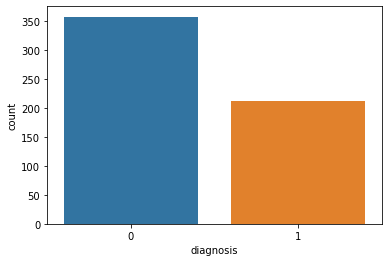

In [22]:
sns.countplot(x="diagnosis",data=df)
plt.show()

In [27]:
df.drop(columns=["id"],inplace=True)

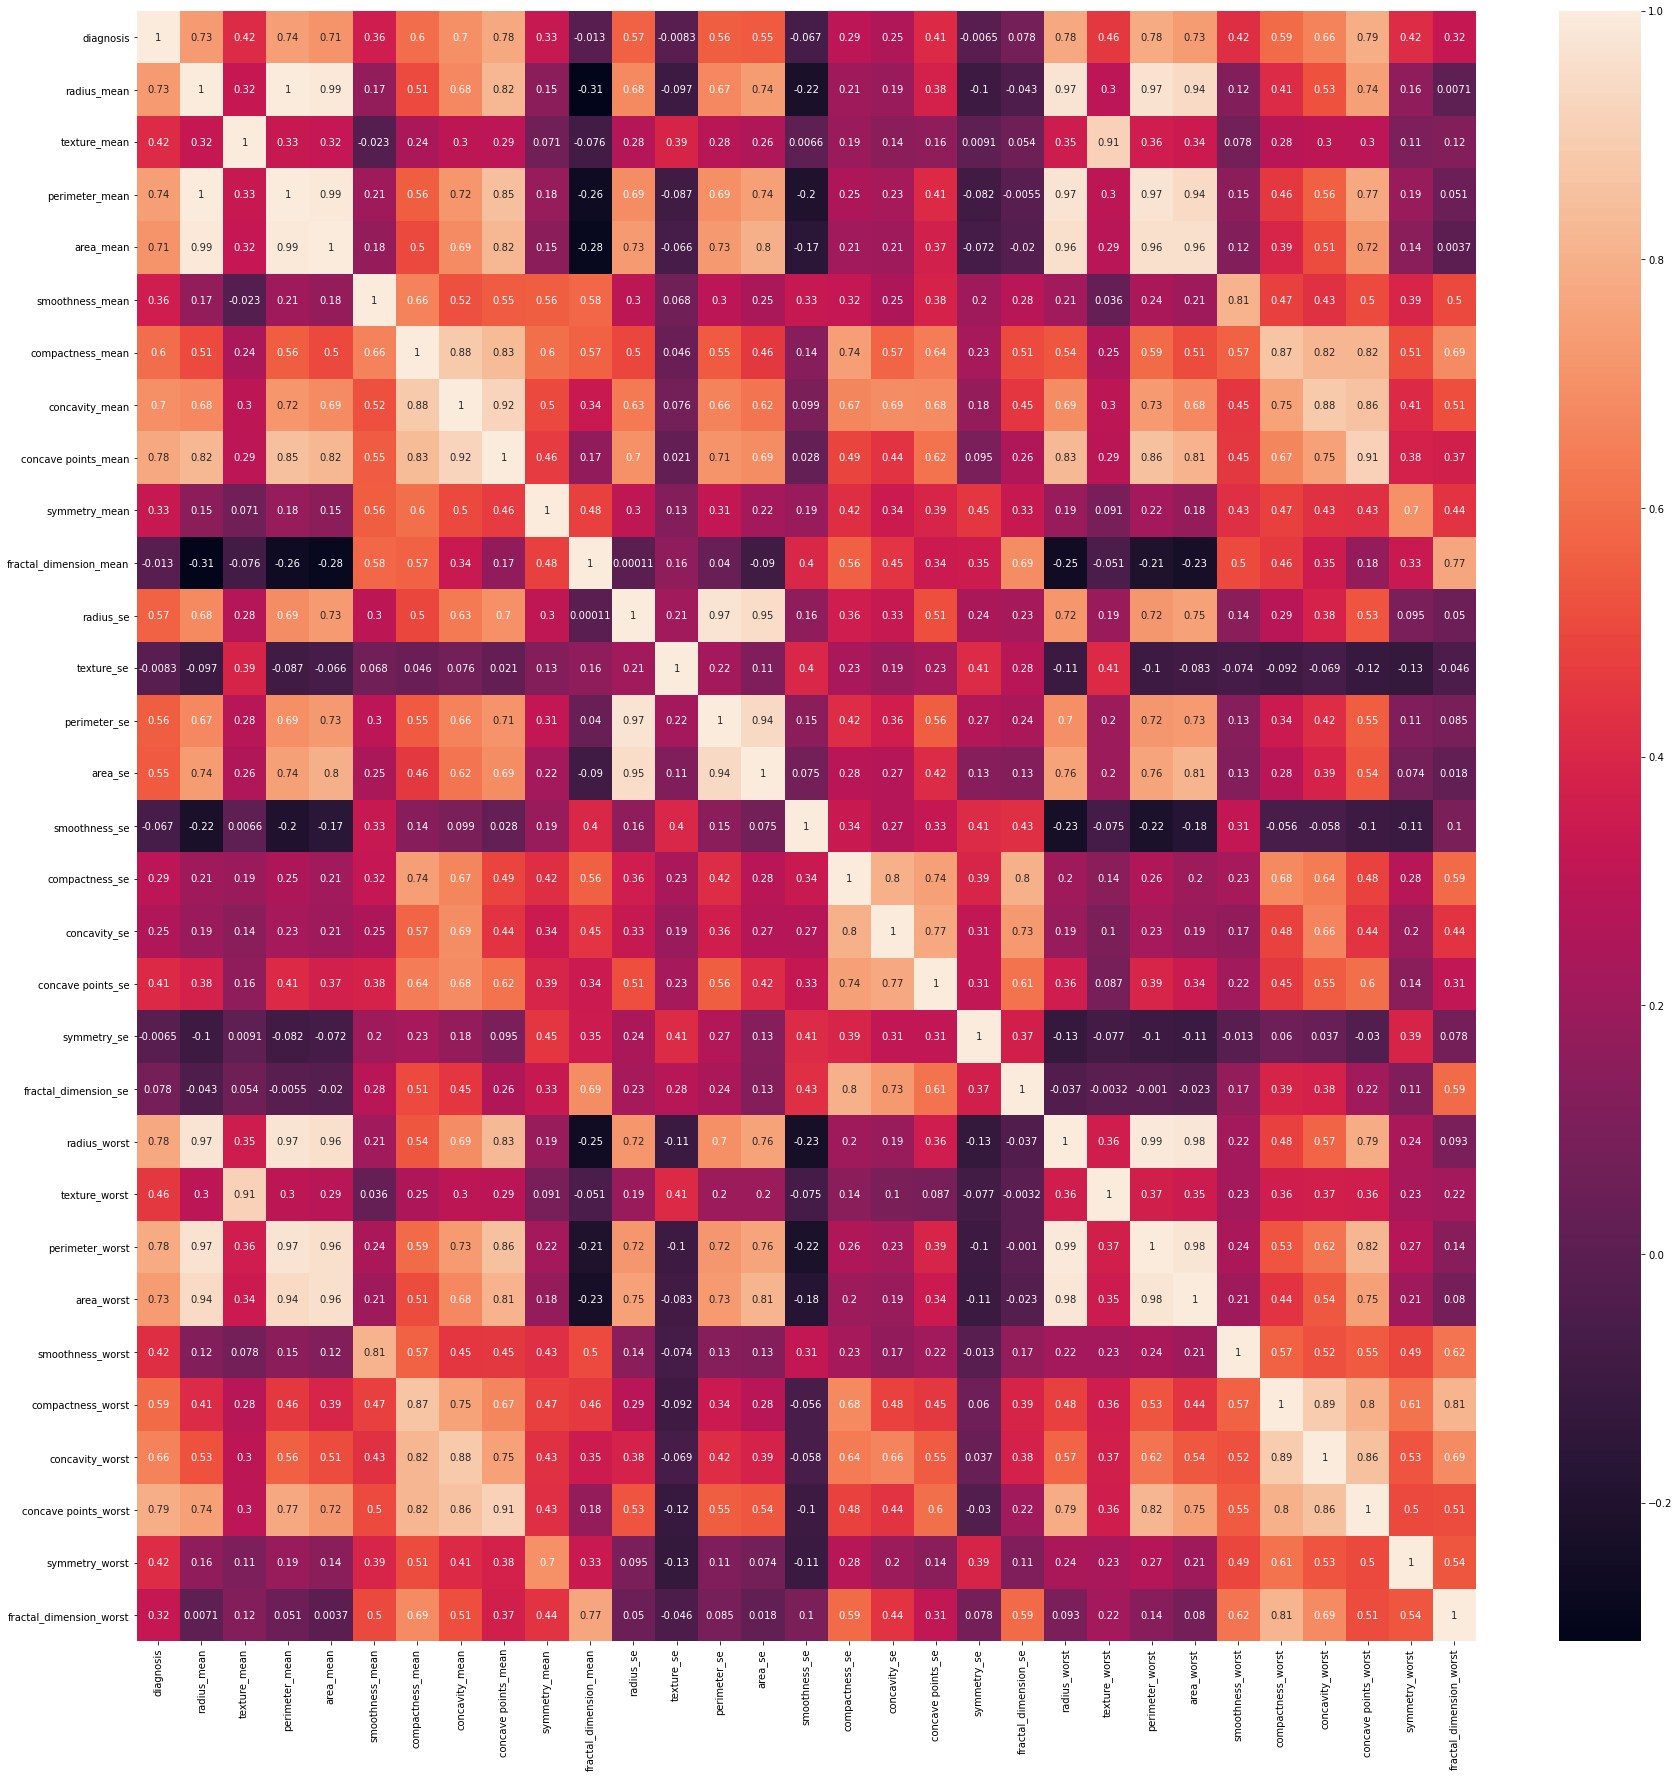

In [32]:
corr=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.show()

In [36]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [40]:
df.drop(columns=['symmetry_se','smoothness_se','texture_se','fractal_dimension_mean'],inplace=True)

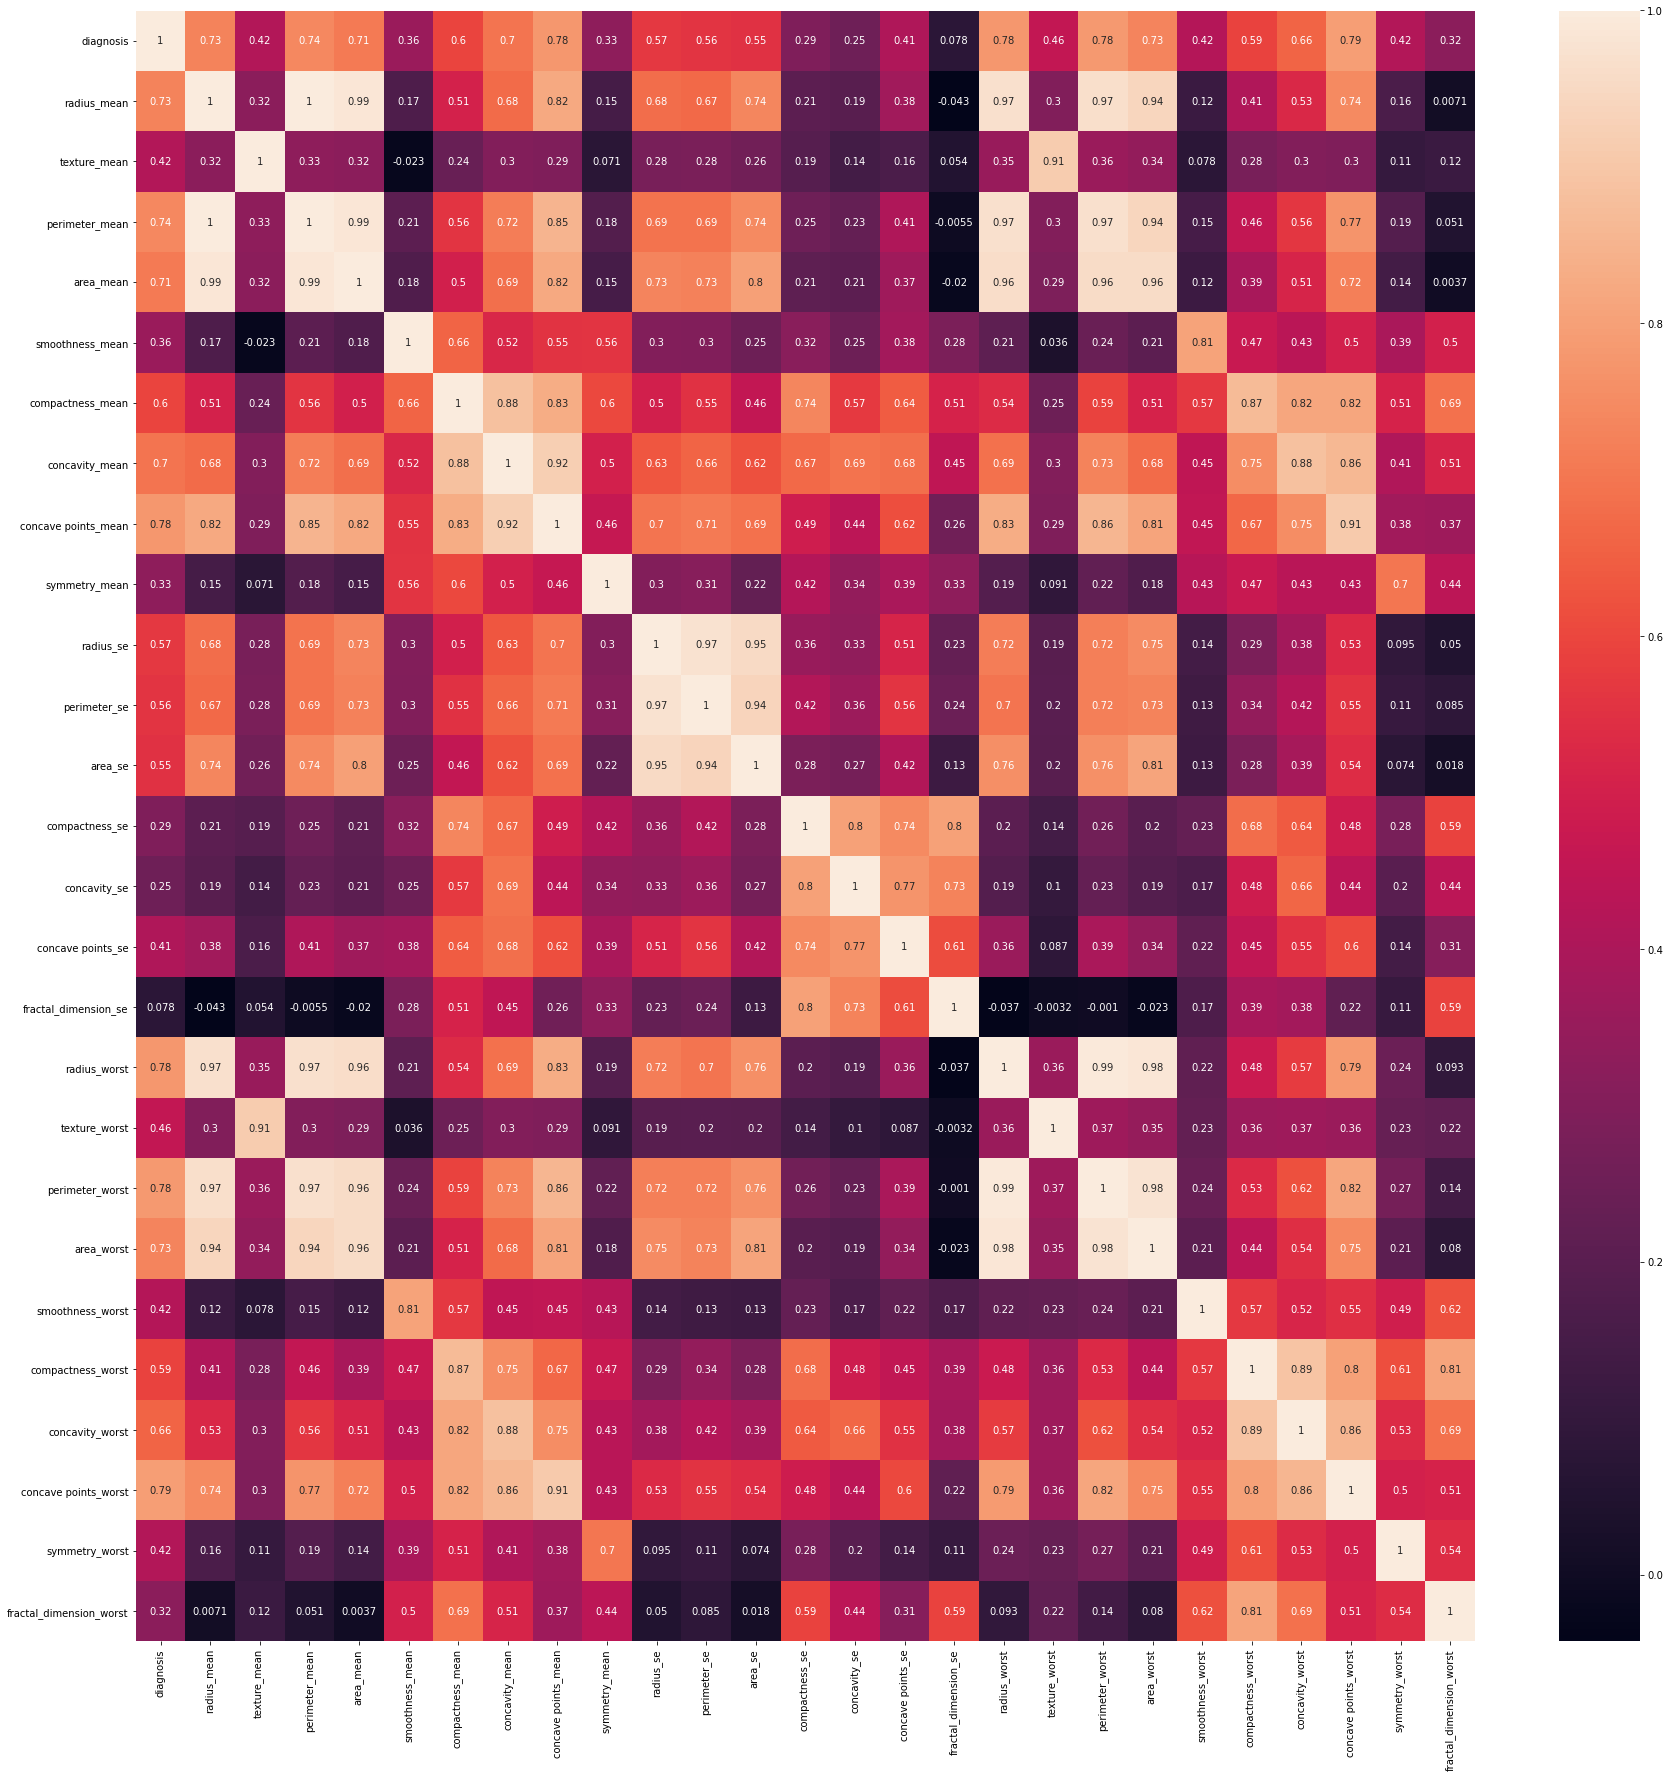

In [41]:
corr=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.show()

In [42]:
x=df.drop(columns=["diagnosis"])
y=df["diagnosis"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [45]:
print("train set",x_train.shape,y_train.shape)

train set (426, 26) (426,)


In [46]:
print("test set",x_test.shape,y_test.shape)

test set (143, 26) (143,)


In [48]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_predict=model.predict(x_test)

In [51]:
confusion_matrix(y_test,y_predict)

array([[88,  1],
       [ 3, 51]])

In [52]:
accuracy_score(y_test,y_predict)

0.972027972027972

### Hyper parameter tuning

In [54]:
classifier=RandomForestClassifier(n_jobs=-1)

In [77]:
max_depth=[int(x) for x in np.linspace(5,50,6)]
n_estimators=[int(x) for x in np.linspace(10,1200,12)]
# max_features=randint(1,27)
# criterion=["gini","entropy"]
# bootstrap=[True,False]
max_features=["auto", "sqrt"]
# min_samples_leaf=randint(1,27)
# min_samples_split=[2,5,10,13,100]
min_samples_leaf=[1,2,5,10]
min_samples_split=[2,5,10,13,100]

In [78]:
param_grid={"n_estimators":n_estimators,
           "max_depth":max_depth,
            "max_features":max_features,
            "min_samples_leaf":min_samples_leaf,
            "min_samples_leaf":min_samples_leaf,
            "min_samples_split":min_samples_split
           }

In [79]:
rf_random=RandomizedSearchCV(classifier,param_distributions=param_grid,
                            n_iter=40,cv=9)

In [80]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   param_distributions={'max_depth': [5, 14, 23, 32, 41, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 13,
                                                              100],
                                        'n_estimators': [10, 118, 226, 334, 442,
                                                         550, 659, 767, 875,
                                                         983, 1091, 1200]})

In [81]:
rf_random.best_params_

{'n_estimators': 1091,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 41}

In [82]:
rf_random.best_score_

0.9624211977935383

In [83]:
classifier=RandomForestClassifier(n_estimators=1091,
 min_samples_split=2,
 min_samples_leaf=2,
 max_features="sqrt",
 max_depth =41)

In [84]:
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=41, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=1091)

In [85]:
y_predict=classifier.predict(x_test)

In [86]:
accuracy_score(y_test,y_predict)

0.972027972027972

In [88]:
pickle.dump(classifier,open("cancer.pkl","wb"))